In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftfreq
from scipy.fft import rfft, rfftfreq, irfft
from scipy.signal import convolve

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


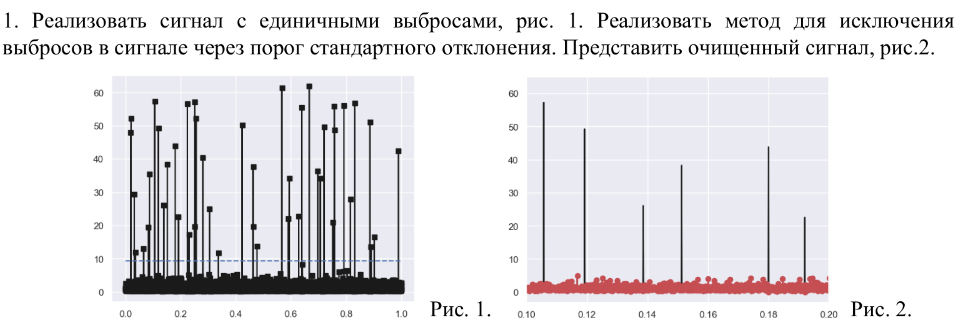

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


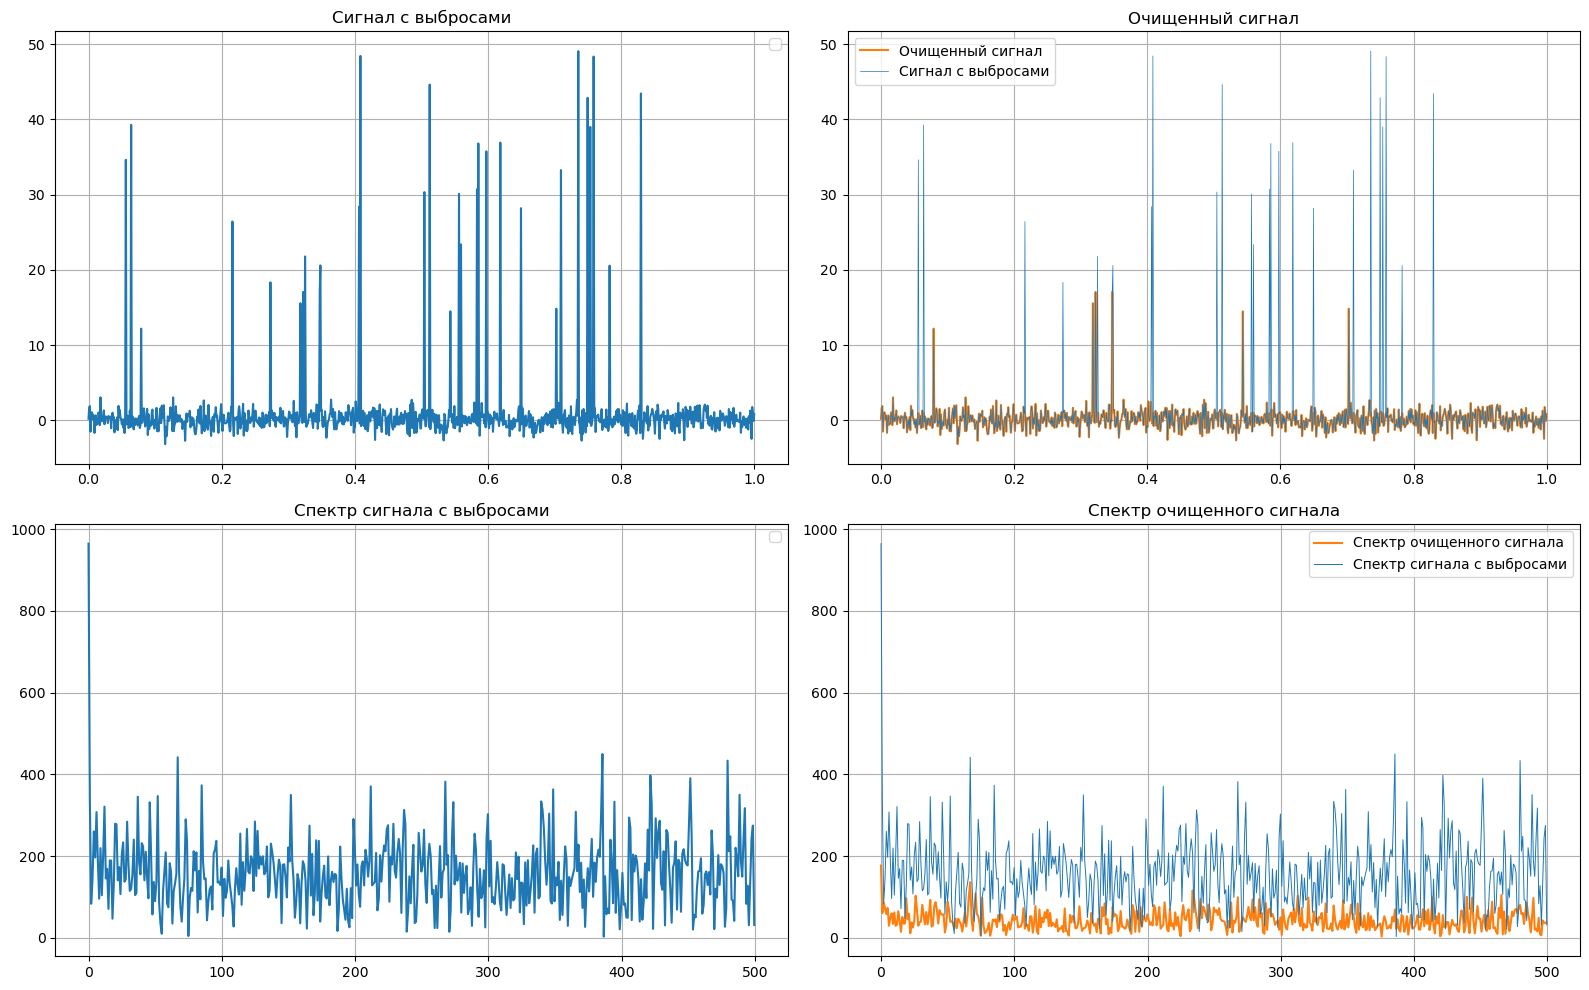

In [2]:
num = 1000  # Количество точек
t = np.linspace(0, 1, num)
signal = np.random.normal(0, 1, num) 
outliers = np.random.choice(num, size=30, replace=False) 
signal[outliers] += np.random.uniform(10, 50, size=len(outliers))  

plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
plt.plot(t, signal, color='C0')
plt.title("Сигнал с выбросами")
plt.legend()
plt.grid()

std_threshold = 3  
mean = np.mean(signal)
std = np.std(signal)
clean_signal = np.copy(signal)
clean_signal[np.abs(signal - mean) > std_threshold * std] = mean 

plt.subplot(2, 2, 2)
plt.plot(t, clean_signal,color='C1', label='Очищенный сигнал')
plt.plot(t, signal, color='C0', linewidth=0.5, label='Сигнал с выбросами')
plt.title("Очищенный сигнал")
plt.legend()
plt.grid()

freqs = rfftfreq(len(t), d=(t[1]-t[0]))
fft_signal = rfft(signal)
fft_signal_clean = rfft(clean_signal)

plt.subplot(2, 2, 3)
plt.plot(freqs, np.abs(fft_signal), color='C0')
plt.title("Спектр сигнала с выбросами")
plt.legend()
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(freqs, np.abs(fft_signal_clean), color='C1', label='Спектр очищенного сигнала')
plt.plot(freqs, np.abs(fft_signal), color='C0', linewidth=0.7, label='Спектр сигнала с выбросами')
plt.title("Спектр очищенного сигнала")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


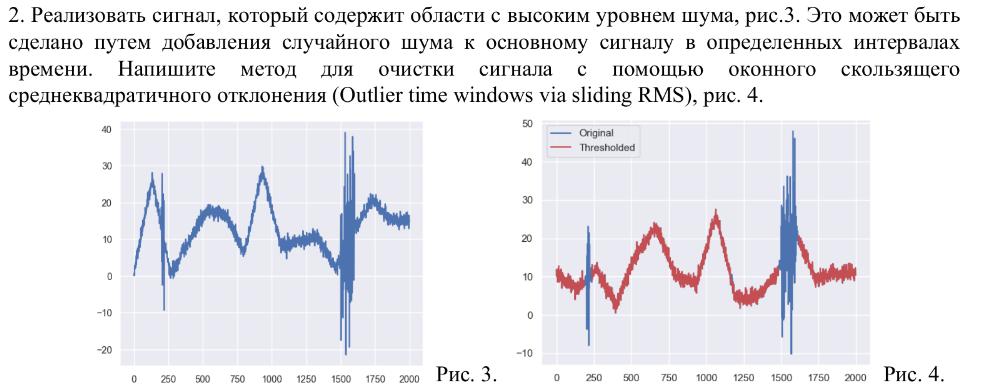

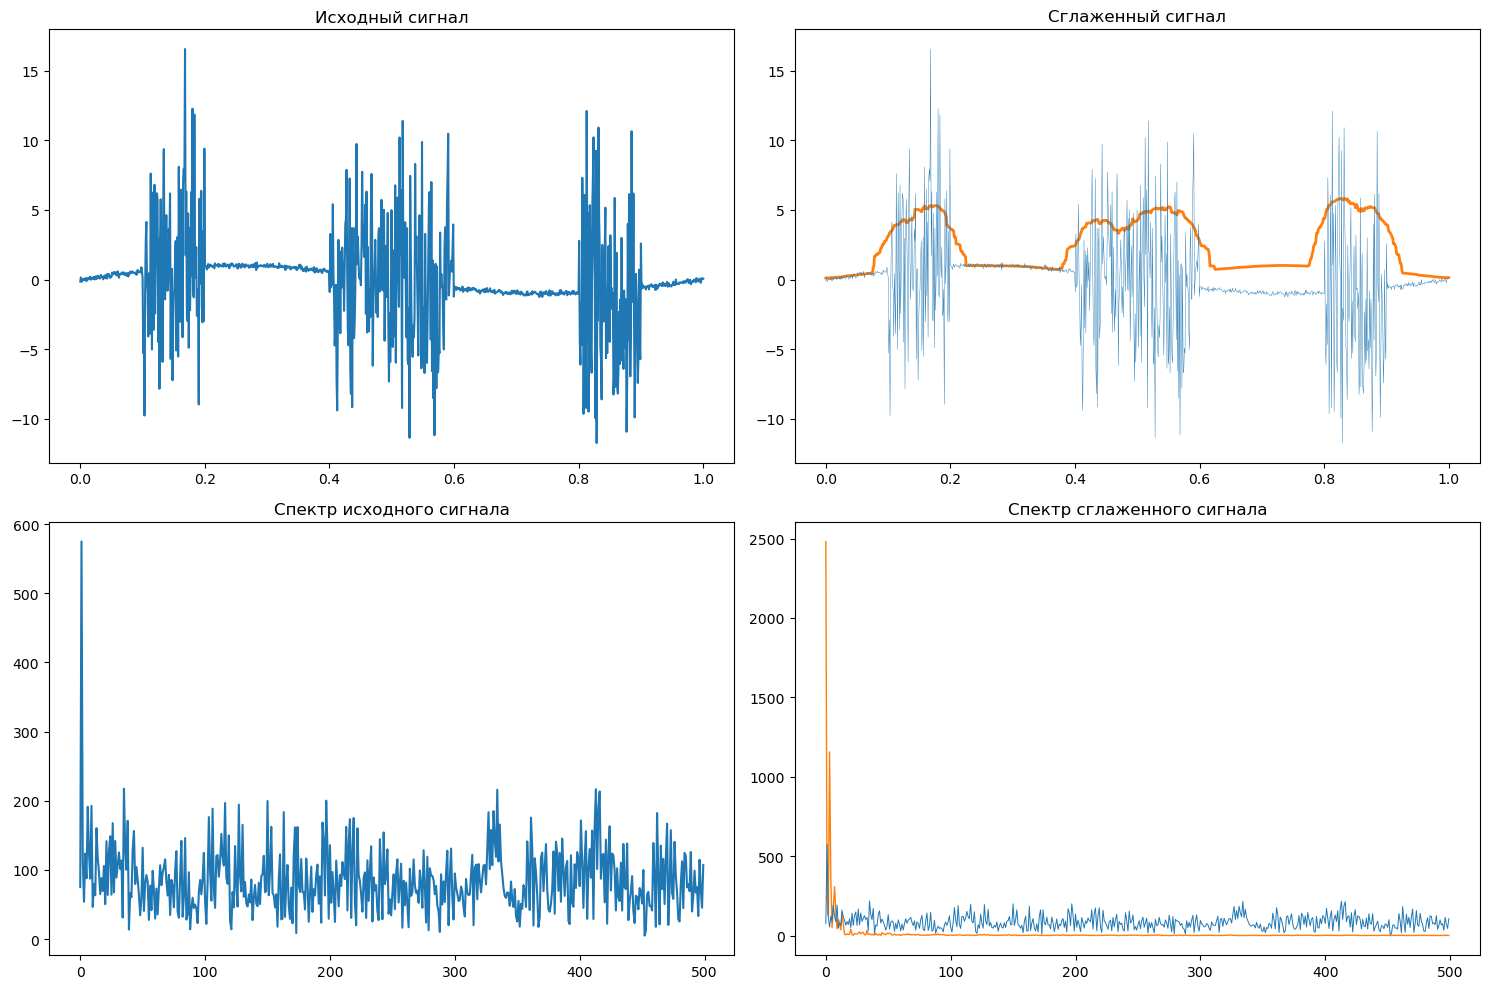

In [3]:
noise_intervals = [(0.1, 0.2),(0.4, 0.6), (0.8, 0.9)]  
noise_level = 5

signal = np.sin(2 * np.pi * t) 
noise = np.random.normal(loc=0, scale=0.1, size=len(t)) 
signal += noise

for start, end in noise_intervals:
    indices = (t >= start) & (t <= end)
    signal[indices] += np.random.normal(loc=0, scale=noise_level, size=np.sum(indices))

N = len(signal)
yf = fft(signal)
xf = fftfreq(N, 1 / len(t))[:N // 2]
y_fft = np.abs(yf[:N // 2])

window_size = 50 
smoothed_signal = np.zeros_like(signal)
half_window = window_size // 2

for i in range(len(signal)):
    start = max(0, i - half_window)
    end = min(len(signal), i + half_window + 1)
    window = signal[start:end]
    rms = np.sqrt(np.mean(window**2))
    smoothed_signal[i] = rms

yf_clean = fft(smoothed_signal)
y_clean_fft = np.abs(yf_clean[:N // 2])

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(t, signal)
plt.title("Исходный сигнал")

plt.subplot(2, 2, 2)
plt.plot(t, smoothed_signal, color = 'C1', linewidth=2)
plt.plot(t, signal, color="C0", linewidth=0.3)
plt.title("Сглаженный сигнал")

plt.subplot(2, 2, 3)
plt.plot(xf, y_fft)
plt.title("Спектр исходного сигнала")

plt.subplot(2, 2, 4)
plt.plot(xf, y_clean_fft, color = 'C1', linewidth=1)
plt.plot(xf, y_fft, color="C0", linewidth=0.7)
plt.title("Спектр сглаженного сигнала")

plt.tight_layout()
plt.show()


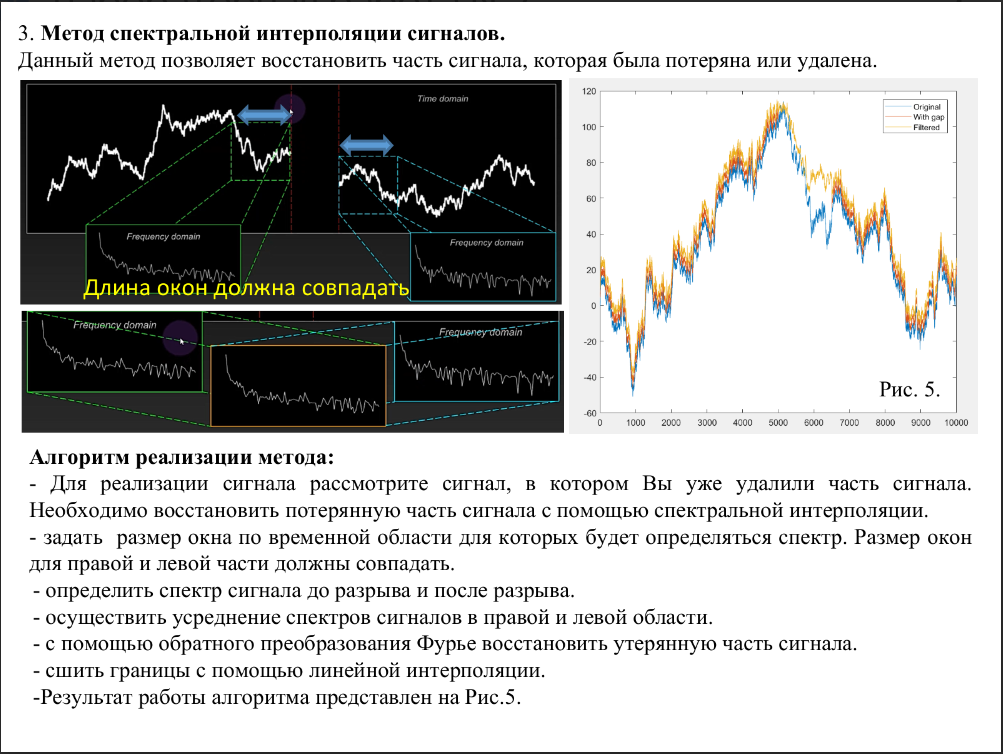

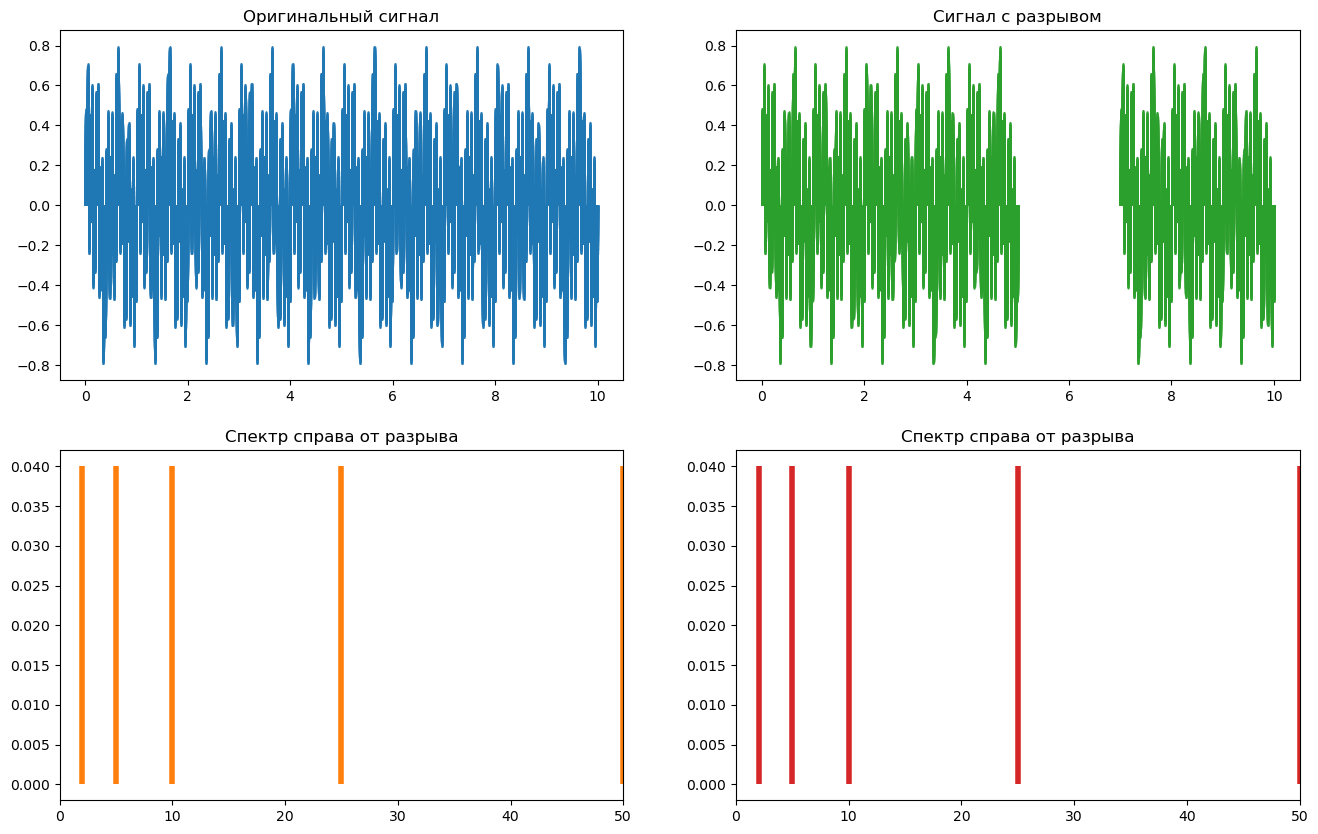

In [10]:
num2 = 50000

t2 = np.linspace(0, 10, num2)
y2 = sum(0.2 * np.sin(2 * np.pi * f * t2) for f in [2, 5, 10, 25, 50])

freq2 = rfftfreq(len(t2), d=(t2[1]-t2[0]))
yff_signal2 = rfft(y2)

y2_croped = y2.copy()
y2_croped[(5 < t2) & (t2 < 7)] = np.NaN

window_size = 2

left = y2_croped[t2 <= window_size]
right = y2_croped[t2 >= 10-window_size]
yff_signal2_left = rfft(left)
yff_signal2_right = rfft(right)

freq2_part = rfftfreq(len(left), d=(t2[1]-t2[0]))


plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.title("Оригинальный сигнал")
plt.vlines(t2, 0, y2, label='Оригинальный сигнал', linewidth=1, color='C0')

plt.subplot(2, 2, 2)
plt.title("Сигнал с разрывом")
plt.vlines(t2, 0, y2_croped, label='Сигнал с разрывом', linewidth=1, color='C2')

plt.subplot(2, 2, 3)
plt.title("Спектр справа от разрыва")
plt.vlines(freq2_part, 0, np.abs(yff_signal2_right) / num2 * 2, label='Спектр справа', linewidth=4, color='C1')
plt.xlim(0, 50)

plt.subplot(2, 2, 4)
plt.title("Спектр справа от разрыва")
plt.vlines(freq2_part, 0, np.abs(yff_signal2_right) / num2 * 2, label='Спектр справа', linewidth=4, color='C3')
plt.xlim(0, 50)

plt.show()

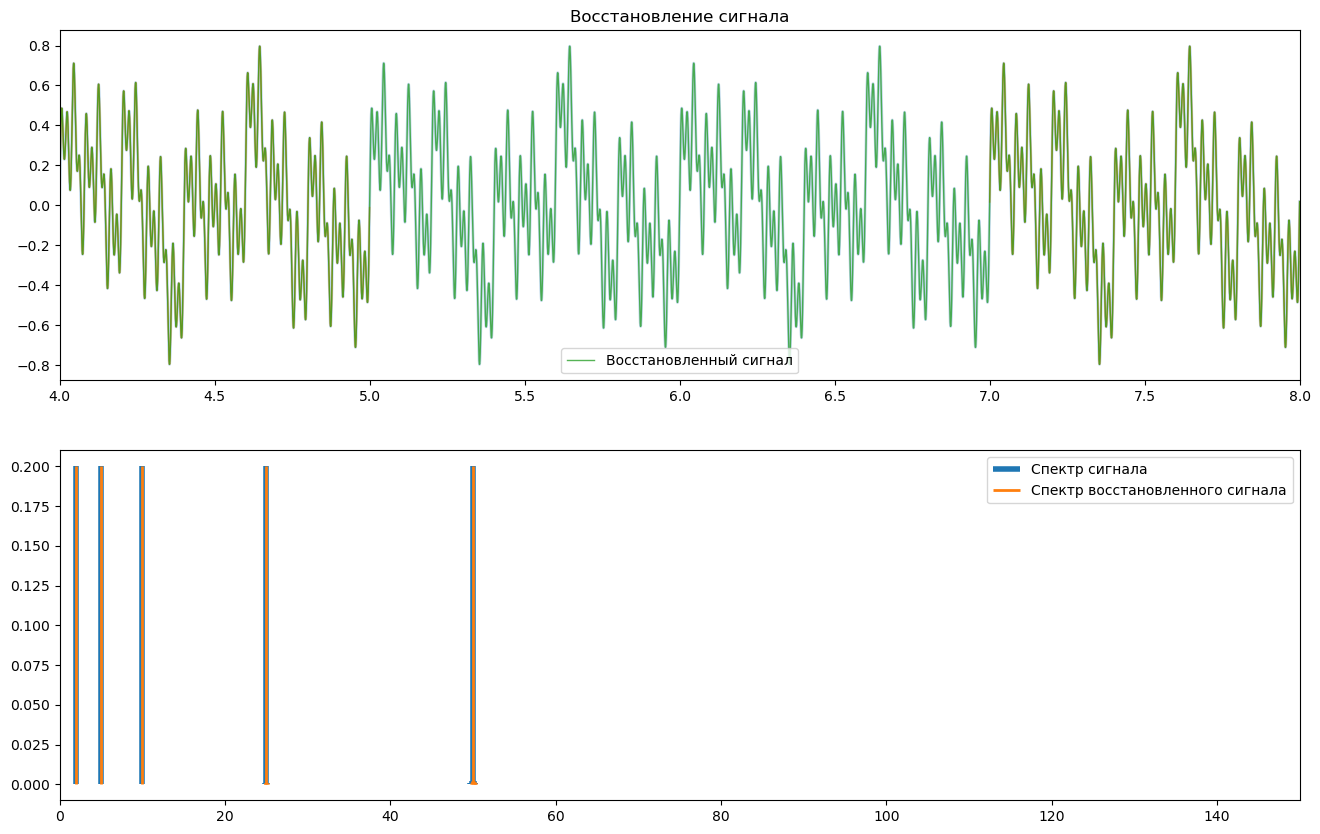

In [18]:
# осуществить усреднение спектров сигналов в правой и левой области
yff_signal2_mean = (yff_signal2_left + yff_signal2_right) / 2

# с помощью обратного преобразования Фурье восстановить утерянную часть сигнала
y2_restored_part = irfft(yff_signal2_mean)

# изменить размер восстановленной части сигнала, чтобы он соответствовал исходному сигналу
y2_restored_part_resized = np.interp(np.linspace(5, 7, int(num2 * 2 / 10)), np.linspace(5, 7, len(y2_restored_part)), y2_restored_part)

# сшить границы
y2_restored = np.concatenate((y2_croped[t2 <= 5], y2_restored_part_resized, y2_croped[t2 >= 7]))

# Вывод результатов
plt.figure(figsize=(16, 10))

plt.subplot(2, 1, 1)
plt.title("Восстановление сигнала")
plt.plot(t2, y2, linewidth=2, alpha=0.3, color='C0')
plt.plot(t2, y2_croped, linewidth=1, color='C1')
plt.plot(t2, y2_restored, linewidth=1, alpha=0.8, label='Восстановленный сигнал', color='C2')
plt.xlim(4, 8)
plt.legend()

plt.subplot(2, 1, 2)
plt.vlines(freq2, 0, np.abs(yff_signal2) / num2 * 2, label='Спектр сигнала', linewidth=4, color='C0')
plt.vlines(freq2, 0, np.abs(rfft(y2_restored)) / num2 * 2, label='Спектр восстановленного сигнала', linewidth=2, color='C1')
plt.xlim(0, 150)
plt.legend()

plt.show()

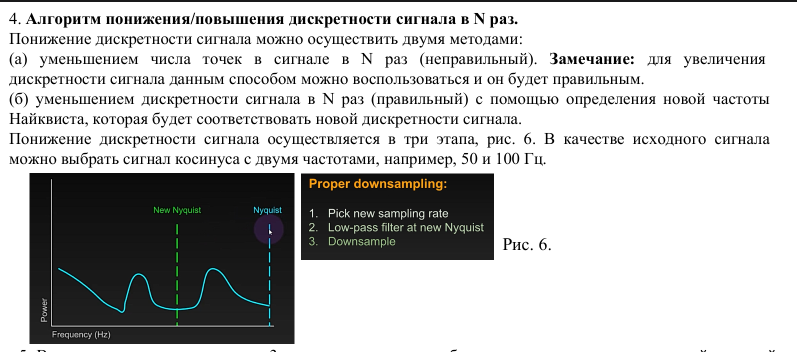

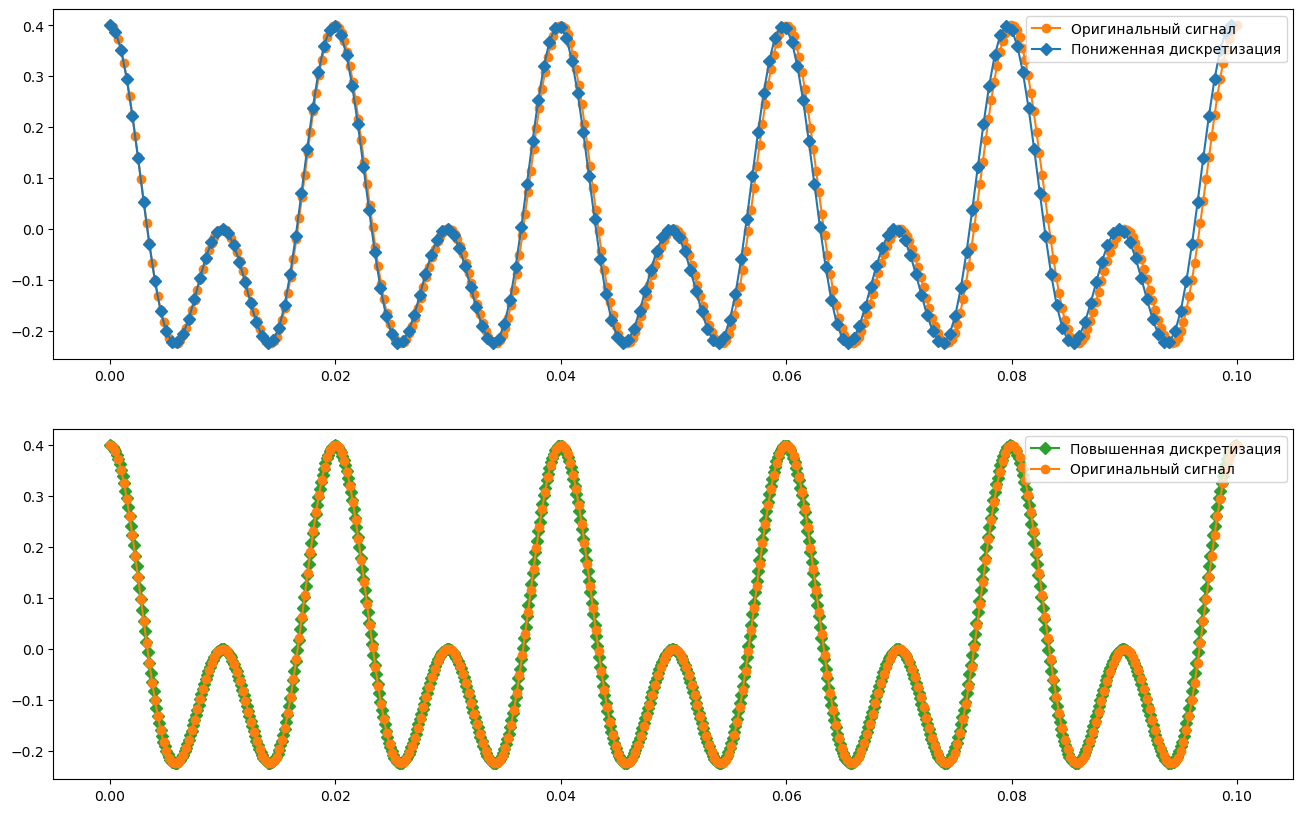

In [ ]:
num3 = 400

t3 = np.linspace(0, 0.1, num3)
y3 = sum(0.2 * np.cos(2 * np.pi * f * t3) for f in [50, 100])

freq3 = rfftfreq(len(t3), d=(t3[1]-t3[0]))
yff_signal3 = rfft(y3)

def downsample(y, original_sampling_rate, new_sampling_rate):
    N = len(y)
    new_Nyquist = new_sampling_rate / 2

    # Применение фильтра нижних частот
    spectrum = np.fft.rfft(y)
    frequencies = np.fft.rfftfreq(N, d=1/original_sampling_rate)
    mask = frequencies <= new_Nyquist
    filtered_signal = np.fft.irfft(spectrum * mask, N)

    # Понижение дискретности
    factor = original_sampling_rate / new_sampling_rate
    new_length = int(N / factor)
    x_old = np.arange(N)
    x_new = np.linspace(0, N - 1, new_length)
    y_down = np.interp(x_new, x_old, filtered_signal)

    return y_down

def upsample(y, original_sampling_rate, new_sampling_rate):
    N = len(y)
    factor = new_sampling_rate / original_sampling_rate
    new_length = int(N * factor)
    x_old = np.arange(N)
    x_new = np.linspace(0, N - 1, new_length)
    return np.interp(x_new, x_old, y)


original_sampling_rate = 1 / (t3[1] - t3[0])
y3_down = downsample(y3, original_sampling_rate, original_sampling_rate / 2)
t3_down = np.linspace(0, 0.1, len(y3_down), endpoint=False)

y3_up = upsample(y3, original_sampling_rate, original_sampling_rate * 2)
t3_up = np.linspace(0, 0.1, len(y3_up), endpoint=False)

plt.figure(figsize=(16, 10))

plt.subplot(2, 1, 1)
plt.plot(t3, y3, color='C1', marker='o', label='Оригинальный сигнал')
plt.plot(t3_down, y3_down, color='C0', marker='D', label='Пониженная дискретизация')
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)
plt.plot(t3_up, y3_up, color='C2', marker='D', label='Повышенная дискретизация')
plt.plot(t3, y3, color='C1', marker='o', label='Оригинальный сигнал')
plt.legend(loc='upper right')

plt.show()

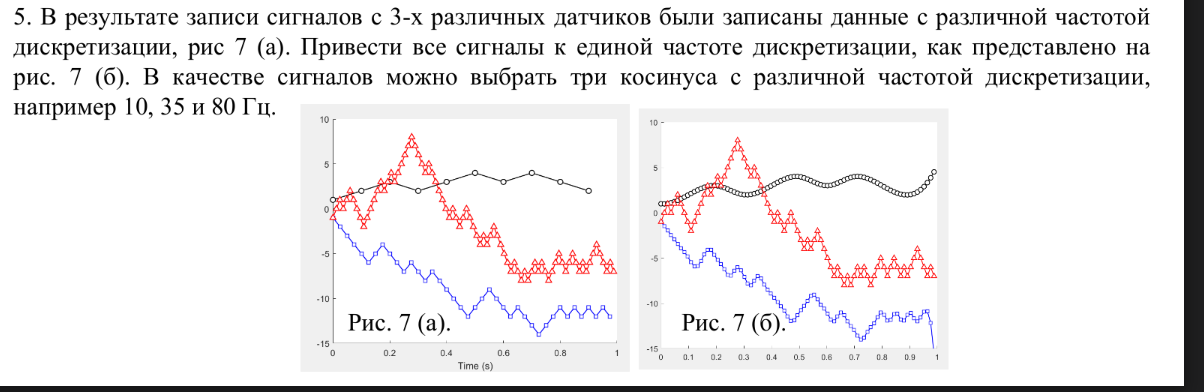

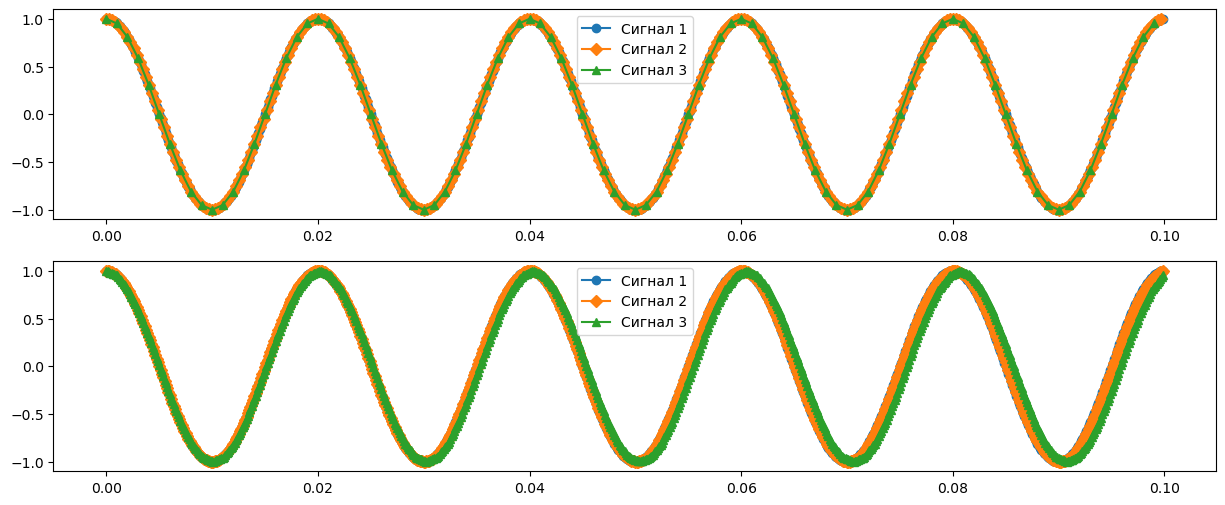

In [ ]:
def cos_signal(t, f, A=1):
    y = 0
    for i in f:
        w = 2 * np.pi * i
        y += A * np.cos(w * t)
    return y


rates = [80, 35, 10]
times = [np.linspace(0, 0.1, int(freq / 0.1), False) for freq in rates]
signals = [cos_signal(time, [50]) for time in times]

def resample_to_max_rate(signals, rates):
    max_rate = max(rates)
    resampled_signals = []

    for signal, rate in zip(signals, rates):
        if rate < max_rate:
            resampled_signals.append(upsample(signal, rate, max_rate))
        else:
            resampled_signals.append(signal)

    return resampled_signals

resampled_signals = resample_to_max_rate(signals, rates)

plt.figure(figsize=(15, 6))
plt.subplot(2, 1, 1)
markers=['o', 'D', '^']
for i, sig in enumerate(signals):
    plt.plot(times[i], sig, marker=markers[i], label=f'Сигнал {i+1}')
plt.legend()

plt.subplot(2, 1, 2)
for i, sig in enumerate(resampled_signals):
    plt.plot(times[0], sig, marker=markers[i], label=f'Сигнал {i+1}')
plt.legend()
plt.show()
